# Import the required Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import graphviz

# Extract Info about the data

In [2]:
df = pd.read_excel("Telco_customer_churn.xlsx")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [4]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

# Data Cleaning and Preprocessing

In [6]:
df.drop(['Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'], axis = 1, inplace = True)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [7]:
df['Country'].unique()

array(['United States'], dtype=object)

In [8]:
df['State'].unique()

array(['California'], dtype=object)

In [9]:
df['Count'].unique()

array([1])

In [10]:
df.drop(['Country', 'State', 'Count'], axis = 1, inplace = True)
df.head()

,CustomerID,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [11]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [12]:
df.drop(['CustomerID', 'Lat Long'], axis = 1, inplace = True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [13]:
df['City'] = df['City'].apply(lambda x: x.replace(' ', '_'))
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [14]:
df['City'].unique()

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', ..., 'Standish',
       'Tulelake', 'Olympic_Valley'], dtype=object)

In [15]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [16]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
df['Total_Charges'].unique()

array([108.15, 151.65, 820.5, ..., 7362.9, 346.45, 6844.5], dtype=object)

In [18]:
df.loc[df['Total_Charges'] == ' ']

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [19]:
len(df.loc[df['Total_Charges'] == ' '])

11

There are 11 missing values in Total_Charges column/

In [20]:
df.loc[df['Total_Charges'] == ' '] = 0
df.loc[df['Total_Charges'] == 0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
2438,0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
2568,0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
2667,0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
2856,0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
4331,0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
4687,0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
5104,0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
5719,0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0
6772,0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0


In [21]:
df['Total_Charges'] = df['Total_Charges'].astype('float')

In [22]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [23]:
df.replace(' ', '_', inplace = True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


In [24]:
X = df.drop('Churn_Value', axis = 1)
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30


In [25]:
y = df['Churn_Value']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64

In [26]:
X.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
dtype: object

# One Hot Encoding for Categorical Variables

In [27]:
X_encoded = pd.get_dummies(X, columns = ['City', 'Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method'], drop_first = True)

In [28]:
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check
0,90003,33.964131,-118.272783,2,53.85,108.15,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
1,90005,34.059281,-118.307420,2,70.70,151.65,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,90006,34.048013,-118.293953,8,99.65,820.50,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
3,90010,34.062125,-118.315709,28,104.80,3046.05,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
4,90015,34.039224,-118.266293,49,103.70,5036.30,False,False,False,False,...,True,True,False,False,False,True,True,False,False,False


In [29]:
y.unique()

array([1, 0])

# Splitting the Data for training and testing (Using Stratification for the Imbalanced Data)

In [30]:
sum(y)/len(y)

0.2653698707936959

There is only 27% of people who left the company. This percentage shows that the data is highly imbalanced and therefore, we will need to use stratification.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42, stratify = y)

In [32]:
sum(y_train)/len(y_train)

0.2654297614539947

In [33]:
sum(y_test)/len(y_test)

0.26519023282226006

# XGBoost Model Building

In [34]:
model = xgb.XGBClassifier(objective = 'binary:logistic', missing = np.nan, seed = 42)
model.fit(X_train,
          y_train,
          verbose = True,
          early_stopping_rounds = 10,
          eval_metric = 'aucpr',
          eval_set = [(X_test, y_test)])

/Users/shubham/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/shubham/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.64598
[1]	validation_0-aucpr:0.65193
[2]	validation_0-aucpr:0.65861
[3]	validation_0-aucpr:0.65084
[4]	validation_0-aucpr:0.65364
[5]	validation_0-aucpr:0.65077
[6]	validation_0-aucpr:0.65488
[7]	validation_0-aucpr:0.65560
[8]	validation_0-aucpr:0.65951
[9]	validation_0-aucpr:0.65951
[10]	validation_0-aucpr:0.66118
[11]	validation_0-aucpr:0.66096
[12]	validation_0-aucpr:0.66139
[13]	validation_0-aucpr:0.66110
[14]	validation_0-aucpr:0.66106
[15]	validation_0-aucpr:0.66058
[16]	validation_0-aucpr:0.66055
[17]	validation_0-aucpr:0.65941
[18]	validation_0-aucpr:0.65836
[19]	validation_0-aucpr:0.65841
[20]	validation_0-aucpr:0.65933
[21]	validation_0-aucpr:0.65929
[22]	validation_0-aucpr:0.65853


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
y_pred = model.predict(X_test)

In [36]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
np.unique(y_pred)

array([0, 1])

### Confusion Matrix for y_test and y_pred

In [38]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1169  125]
 [ 212  255]]


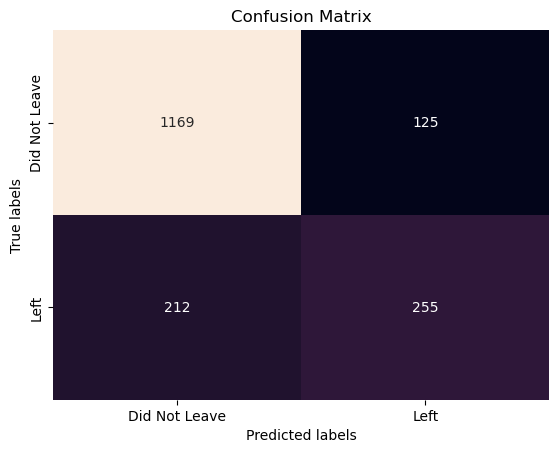

In [39]:
sb.heatmap(cm, annot = True, fmt = 'g', cbar = False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Did Not Leave', 'Left'])
plt.yticks(ticks=[0.5, 1.5], labels=['Did Not Leave', 'Left'])
plt.show()

# Optimizing the Parameters with Cross Validation (GridSearchCV)

In [44]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [1, 3, 5]
}
grid_xgb = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall').fit(X_train, y_train)

In [45]:
print('Best parameters:', grid_xgb.best_params_)
print('Best score:', grid_xgb.best_score_)

Best parameters: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'reg_lambda': 10.0, 'scale_pos_weight': 5}
Best score: 0.9443924758515505


In [47]:
param_grid = {
    'max_depth': [4],
    'learning_rate': [0.1, 0.5, 1],
    'gamma': [0.25],
    'reg_lambda': [10, 20, 100],
    'scale_pos_weight': [3]
}
grid_xgb_2 = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall').fit(X_train, y_train)

In [48]:
print('Best parameters:', grid_xgb_2.best_params_)
print('Best score:', grid_xgb_2.best_score_)

Best parameters: {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 100, 'scale_pos_weight': 3}
Best score: 0.8316624300965938


# Building, Evaluating, and Interpreting the Optimal XGBoost Model

In [49]:
optimal_model = xgb.XGBClassifier(seed = 42, objective = 'binary:logistic', gamma = 0.25, learn_rate = 0.1, max_depth = 4, reg_lambda = 100, scale_pos_weight = 3, subsample = 0.9, colsample_bytree = 0.5)
optimal_model.fit(X_train, y_train, verbose = True, early_stopping_rounds = 10, eval_metric = 'aucpr', eval_set = [(X_test, y_test)])

/Users/shubham/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/shubham/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.54791
[1]	validation_0-aucpr:0.61164
[2]	validation_0-aucpr:0.61588
[3]	validation_0-aucpr:0.61650
[4]	validation_0-aucpr:0.61636
[5]	validation_0-aucpr:0.63049
[6]	validation_0-aucpr:0.63424
[7]	validation_0-aucpr:0.63336
[8]	validation_0-aucpr:0.63278


/Users/shubham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:18:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "learn_rate" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	validation_0-aucpr:0.63273
[10]	validation_0-aucpr:0.64872
[11]	validation_0-aucpr:0.64487
[12]	validation_0-aucpr:0.64976
[13]	validation_0-aucpr:0.65050
[14]	validation_0-aucpr:0.64851
[15]	validation_0-aucpr:0.65618
[16]	validation_0-aucpr:0.65936
[17]	validation_0-aucpr:0.65762
[18]	validation_0-aucpr:0.65469
[19]	validation_0-aucpr:0.66093
[20]	validation_0-aucpr:0.66159
[21]	validation_0-aucpr:0.66158
[22]	validation_0-aucpr:0.66220
[23]	validation_0-aucpr:0.66152
[24]	validation_0-aucpr:0.66179
[25]	validation_0-aucpr:0.66438
[26]	validation_0-aucpr:0.66501
[27]	validation_0-aucpr:0.66302
[28]	validation_0-aucpr:0.66560
[29]	validation_0-aucpr:0.66644
[30]	validation_0-aucpr:0.66486
[31]	validation_0-aucpr:0.66329
[32]	validation_0-aucpr:0.66428
[33]	validation_0-aucpr:0.66450
[34]	validation_0-aucpr:0.66515
[35]	validation_0-aucpr:0.66579
[36]	validation_0-aucpr:0.66664
[37]	validation_0-aucpr:0.66570
[38]	validation_0-aucpr:0.66645
[39]	validation_0-aucpr:0.66782
[40]	vali

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, grow_policy=None, importance_type=None,
              interaction_constraints=None, learn_rate=0.1, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [50]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[995 299]
 [110 357]]


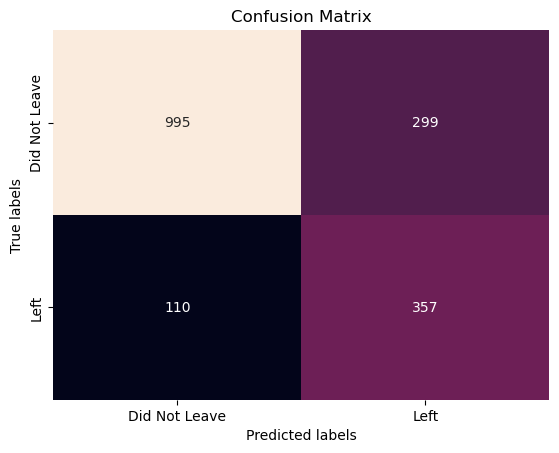

In [51]:
sb.heatmap(cm, annot = True, fmt = 'g', cbar = False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Did Not Leave', 'Left'])
plt.yticks(ticks=[0.5, 1.5], labels=['Did Not Leave', 'Left'])
plt.show()

# Plotting the Optimal XGBoost Tree

/Users/shubham/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [17:34:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "learn_rate" } are not used.

  warnings.warn(smsg, UserWarning)


weight:  {'Latitude': 1.0, 'Longitude': 1.0, 'Tenure_Months': 3.0, 'Monthly_Charges': 1.0, 'City_Carlsbad': 1.0, 'City_Running_Springs': 1.0, 'Partner_No': 1.0, 'Dependents_No': 2.0, 'Internet_Service_Fiber optic': 1.0, 'Tech_Support_No': 1.0, 'Contract_Month-to-month': 1.0}
gain:  {'Latitude': 12.135623931884766, 'Longitude': 5.039527893066406, 'Tenure_Months': 47.00181579589844, 'Monthly_Charges': 44.2181396484375, 'City_Carlsbad': 3.3427734375, 'City_Running_Springs': 9.521728515625, 'Partner_No': 9.872261047363281, 'Dependents_No': 54.87657928466797, 'Internet_Service_Fiber optic': 223.02685546875, 'Tech_Support_No': 23.206790924072266, 'Contract_Month-to-month': 1468.0218505859375}
cover:  {'Latitude': 224.38507080078125, 'Longitude': 98.58966064453125, 'Tenure_Months': 443.6118469238281, 'Monthly_Charges': 601.0225219726562, 'City_Carlsbad': 425.8074951171875, 'City_Running_Springs': 427.5546569824219, 'Partner_No': 50.16840744018555, 'Dependents_No': 412.9533996582031, 'Internet

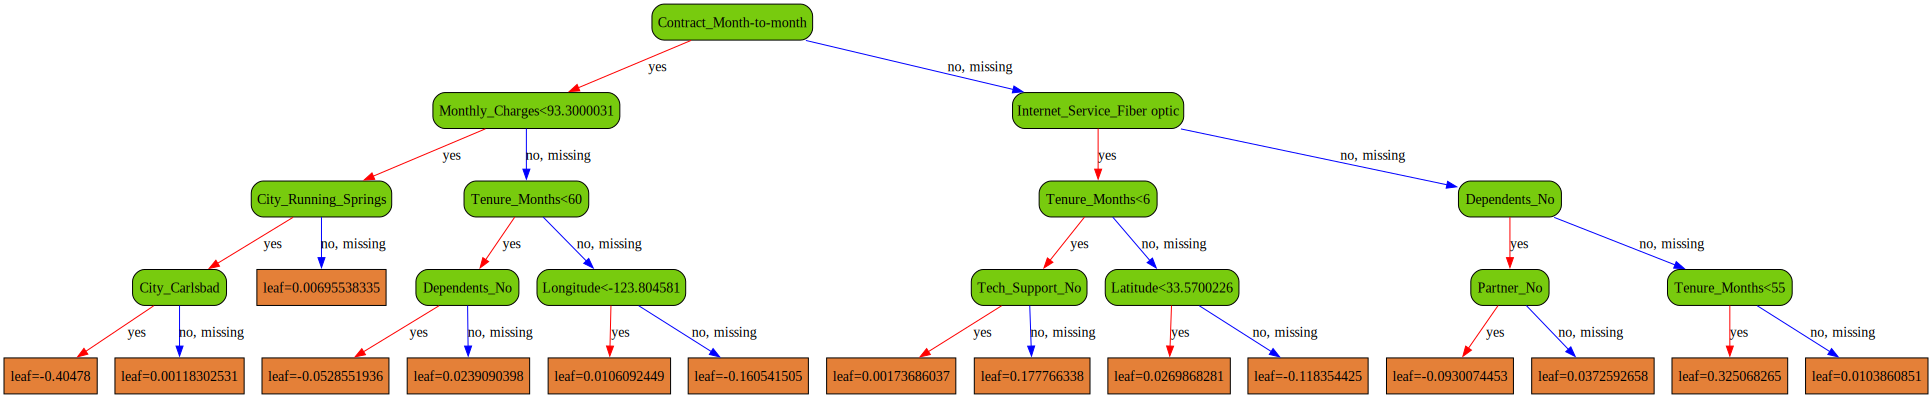

In [59]:
optimal_model_tree = xgb.XGBClassifier(seed = 42, objective = 'binary:logistic', gamma = 0.25, learn_rate = 0.1, max_depth = 4, reg_lambda = 100, scale_pos_weight = 3, subsample = 0.9, colsample_bytree = 0.5, n_estimators = 1)
optimal_model_tree.fit(X_train, y_train)

bst = optimal_model_tree.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover'):
    print('%s: ' % importance_type, bst.get_score(importance_type = importance_type))

# Visualize the first tree
node_params = {'shape': 'box', 'style': 'filled, rounded', 'fillcolor': '#78cbe'}
leaf_params = {'shape': 'box', 'style': 'filled', 'fillcolor': '#e48038'}

graph = xgb.to_graphviz(optimal_model_tree, num_trees=0, size='10,10',
                        condition_node_params=node_params, leaf_node_params=leaf_params)

# Display the graph; may not be necessary in Jupyter Notebooks, but included for completeness
display(graph)

Let's simplify how to understand an XGBoost Tree:

- At the start of the tree, we decide which way to go based on a question about one of the data's features. For example, we might ask if the type of contract someone has is a "Month-to-month" contract. If the answer is "yes" (meaning, in this case, the value is less than 1), we go one way, and if "no," we go another. 
- As we move down the tree, each point where we have to decide which way to go is based on additional questions like the first one, using different features or the same feature but with different conditions.
- For each decision point, there are three possible paths: "yes," "no," and sometimes "missing." "Yes" means the condition at this decision point is true, "no" means it's false, and "missing" is a special path we follow if we don't have any information about this feature for a particular observation.
- Eventually, we end up at a "leaf" of the tree. Unlike the decision points, leaves don't ask questions. Instead, each leaf gives us an output value based on the path we followed to get there. This value helps make the final prediction.

In simple terms, imagine walking through a maze where at each intersection, you're asked a yes-or-no question about your data. Your answers guide you through the maze, and where you come out tells you the prediction the tree makes based on your answers. If ever you don't know the answer to a question, there's a special path just for that, ensuring you still find your way through the maze.